# [매일10분 데이터 분석] 파이썬 머신러닝 맛보기 1탄 (Scikit Learn 이해하기 ) 

- Scikit Learn: Pandas와 상호작용이 유연하다!
- 데이터 마이닝: 데이터로부터 패턴이나 규칙을 찾아 실무에 적용할 수 있는 insight를 발견하는 방법론이다. 여기에 scikit learn 라이브러리가 최적화 되어 있다.
    - 데이터 마이닝 문제해결 Process: KDD / SEMMA, ...
        1. 데이터 준비
            - Target: "매출액" / X(feature): 제품명, 판매일자, 요일, ...
        1. 데이터 전처리
            - 결측치 / 이상치 처리
            - 학습(70 - 80%) / 평가(20 - 30%) 데이터 분할(랜덤 추출)
        1. 데이터 학습(모델)
            - 알고리즘(회귀분석, 결정나무, 앙상블,...)
        1. 모델 평가

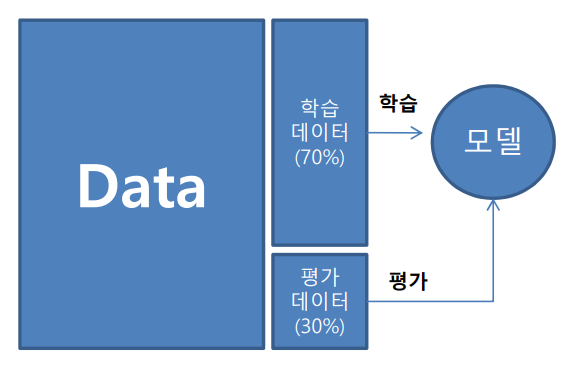

In [1]:
from IPython.display import Image
Image('C:/Users/user/Desktop/Python/Pandas_Analysis/사진/캡처1.png')

### 목표: 새로운 고객이 들어왔을 때 VIP고객인지 평범한 고객인지 분류하는 모델 만들기

In [2]:
import pandas as pd
df1=pd.read_csv('data06.csv')
df1.head(2)

,회원번호,조합원상태,주소-구,주소-동,성별,연령,연령대,총구매금액,총구매수량,1회방문시구매금액(평균),배송서비스신청여부,모바일알람여부,Gold_member
0,272369856,정상회원,수지구,풍덕천동,여,45.0,40대,5733884,546.5,47782,미신청,수신,VIP
1,1506656256,정상회원,수지구,풍덕천동,여,36.0,30대이하,673414,90.0,35443,미신청,.,normal


본 데이터는 **회원번호**를 key값으로 정리된 데이터이다.

'주소-구' 와 '주소-동'은 각각 독립된 컬럼이 아닌 종속적인 관계이다.

목표가 "고객의 Gold_member 여부"이므로 **Target 변수는 Gold_member**가 된다.

## 1. 데이터 준비 및 가공

- Y (Target): **Gold_member** / X (Feature) ...
- Feature Selection
- Missing Value 처리 

### 1) 불필요한 컬럼 제거

In [3]:
df2 = df1.drop(columns = ['회원번호', '주소-동', '연령대', '1회방문시구매금액(평균)'])
df2.head()

,조합원상태,주소-구,성별,연령,총구매금액,총구매수량,배송서비스신청여부,모바일알람여부,Gold_member
0,정상회원,수지구,여,45.0,5733884,546.5,미신청,수신,VIP
1,정상회원,수지구,여,36.0,673414,90.0,미신청,.,normal
2,정상회원,수지구,여,34.0,655919,66.0,미신청,.,normal
3,정상회원,수지구,여,51.0,2984534,252.1,미신청,.,normal
4,정상회원,수지구,여,51.0,1901488,152.0,신청,.,normal


연령 데이터와 연령대 데이터는 서로 중복되는 데이터이다. 연령대 데이터가 연령 데이터보다 좀더 큰 범주이므로

보다 정확한 분석을 위해 연령 데이터를 사용한다. 

또한 연령대 데이터를 사용하면 dummy처리를 했을 때 무수히 많은 컬럼이 생성되고 컴퓨터가 처리해야할 양이 늘어난다.

### 2) Missing Value 정리

In [4]:
# 각 컬럼별 결측값 개수 확인
df2.isnull().sum()

조합원상태          0
주소-구           0
성별             1
연령             1
총구매금액          0
총구매수량          0
배송서비스신청여부      0
모바일알람여부        0
Gold_member    0
dtype: int64

In [5]:
# 결측값이 포함된 row 전부 제거(dropna)
df3 = df2.dropna()
df3.head()

,조합원상태,주소-구,성별,연령,총구매금액,총구매수량,배송서비스신청여부,모바일알람여부,Gold_member
0,정상회원,수지구,여,45.0,5733884,546.5,미신청,수신,VIP
1,정상회원,수지구,여,36.0,673414,90.0,미신청,.,normal
2,정상회원,수지구,여,34.0,655919,66.0,미신청,.,normal
3,정상회원,수지구,여,51.0,2984534,252.1,미신청,.,normal
4,정상회원,수지구,여,51.0,1901488,152.0,신청,.,normal


### 3) Target , Feature 데이터 값 변환

In [6]:
# Gold_member 컬럼 데이터(Target) 빈도수 확인
df3['Gold_member'].value_counts()

normal    6421
VIP         96
Name: Gold_member, dtype: int64

컴퓨터는 데이터가 문자일 때 학습할 수 없다. 따라서 Gold_member 데이터를 숫자 데이터로 변환해야 한다.

In [7]:
# Gold_member 컬럼의 데이터를 수치형으로 변환(replace), 새로운 컬럼 생성
df3['Target'] = df3['Gold_member'].replace({'VIP':1, 'normal':0})
df3.head()

<ipython-input-7-af95b7b21914>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Target'] = df3['Gold_member'].replace({'VIP':1, 'normal':0})


,조합원상태,주소-구,성별,연령,총구매금액,총구매수량,배송서비스신청여부,모바일알람여부,Gold_member,Target
0,정상회원,수지구,여,45.0,5733884,546.5,미신청,수신,VIP,1
1,정상회원,수지구,여,36.0,673414,90.0,미신청,.,normal,0
2,정상회원,수지구,여,34.0,655919,66.0,미신청,.,normal,0
3,정상회원,수지구,여,51.0,2984534,252.1,미신청,.,normal,0
4,정상회원,수지구,여,51.0,1901488,152.0,신청,.,normal,0


In [8]:
# X(Feature) 변수(문자 데이터)들을 0 또는 1의 값으로 분류(pd.get_dummies)
pd.get_dummies(df3) # one-hot Encoding

,연령,총구매금액,총구매수량,Target,조합원상태_이관처리중,조합원상태_정상회원,조합원상태_탈퇴,조합원상태_탈퇴신청,조합원상태_탈퇴처리중,주소-구_광주,...,주소-구_하남,주소-구_화성,성별_남,성별_여,배송서비스신청여부_미신청,배송서비스신청여부_신청,모바일알람여부_.,모바일알람여부_수신,Gold_member_VIP,Gold_member_normal
0,45.0,5733884,546.5,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
1,36.0,673414,90.0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
2,34.0,655919,66.0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
3,51.0,2984534,252.1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
4,51.0,1901488,152.0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,32.0,52646,1.1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
6515,46.0,61740,9.0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
6516,82.0,15507,2.0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
6517,55.0,36374,2.0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1


In [9]:
# 모든 변수들이 dummy화 되므로 이전에 전처리한 Target 컬럼들 제거
X = pd.get_dummies(df3.drop(columns=['Gold_member', 'Target'])) # one-hot Encoding
Y = df3['Target']

Scikit Learn으로도 전처리가 가능하지만 Pandas에서 더 편리하게 전처리할 수 있다.

In [10]:
X

,연령,총구매금액,총구매수량,조합원상태_이관처리중,조합원상태_정상회원,조합원상태_탈퇴,조합원상태_탈퇴신청,조합원상태_탈퇴처리중,주소-구_광주,주소-구_기타,...,주소-구_중원구,주소-구_처인구,주소-구_하남,주소-구_화성,성별_남,성별_여,배송서비스신청여부_미신청,배송서비스신청여부_신청,모바일알람여부_.,모바일알람여부_수신
0,45.0,5733884,546.5,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,36.0,673414,90.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,34.0,655919,66.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,51.0,2984534,252.1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,51.0,1901488,152.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,32.0,52646,1.1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
6515,46.0,61740,9.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
6516,82.0,15507,2.0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
6517,55.0,36374,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0


X와 Y를 나누는 것까지 Pandas로 진행하면 된다.

## 2. 데이터 전처리( 데이터 분할 )

이 단계부터 Scikit Learn을 사용한다.

- Scikit Learn 내의 기능 함수
    - model_selection: 데이터 분할
    - metrics: 데이터 평가
    - tree: 알고리즘 기법 중 하나

In [11]:
# sklearn 라이브러리 내에 model_selection 모듈 안에 있는 train_test_split 함수를 가져온다. 
from sklearn.model_selection import train_test_split 

# sklearn 라이브러리 내에 tree 알고리즘의 DecisionTreeClassifier 분류 알고리즘을 가져온다.
from sklearn.tree import DecisionTreeClassifier 

# sklearn 라이브러리 내에 평가 알고리즘의 classification_report 평가 알고리즘을 가져온다.
from sklearn.metrics import classification_report 

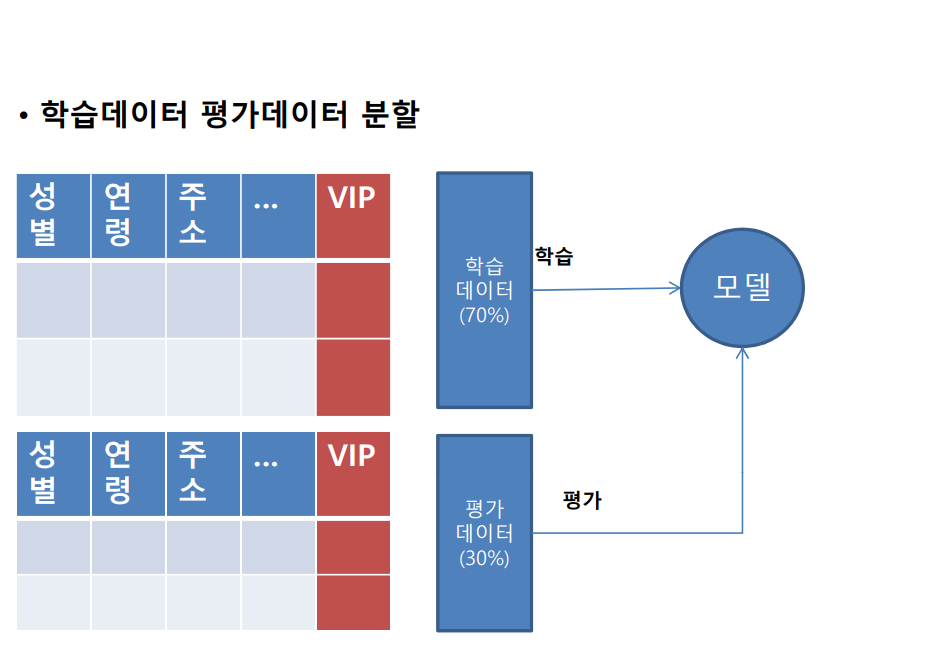

In [12]:
Image('C:/Users/user/Desktop/Python/Pandas_Analysis/사진/학습데이터.PNG')

In [13]:
# 학습 데이터, 평가 데이터 분할(3:7)
# train_test_split 함수는 학습 데이터와 평가 데이터를 랜덤 추출
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2020)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4561, 30)
(1956, 30)
(4561,)
(1956,)


random_stat 옵션을 사용하면 어떤 컴퓨터에서든지 똑같은 데이터를 추출한다.

**[주의]**

추출된 데이터를 shape 함수를 이용해서 데이터 셋이 잘 나누어졌는지(데이터 구조가 일치하는지) 반드시 확인해야 한다.

**★데이터 분석가는 데이터 구조와 타입을 잘 확인해야 한다.★**

## 3. 학습

지도 학습: Y와 X 간의 패턴 찾기  
---> 분류: Y값이 문자형 또는 범주형 변수  
---> 회귀: Y값이 연속형 변수

비지도 학습

강화 학습

In [14]:
# DecisionTreeClassifier 알고리즘을 이용해 데이터에서 규칙을 찾아 낸다.
model = DecisionTreeClassifier()

# 데이터 안에 어떤 규칙이 있는지 학습시킨다.
model.fit(X_train, Y_train)

DecisionTreeClassifier()

DecisionTreeClassifier 알고리즘에 의해 데이터 셋에 맞게 수식을 도출한다.

다음 단계에서는 모델이 잘 만들어졌는지 평가해야한다.

## 4. 평가

In [15]:
# 1
Y_train_pred = model.predict(X_train) # 알고리즘이 학습을 얼마나 잘 시켰는가?

# 2
Y_test_pred = model.predict(X_test) # 새로운 데이터가 들어올 때 얼마나 좋은 성능을 나타내는가?

1. 학습: 학습에 의해 나온 Y_train_pred 과 실제 Y_train이 얼마나 일치하는지 판단한다.


2. 일반화: 학습에 참여하지 않은 새로운 데이터를 얼마나 잘 예측하는지 판단한다.

In [17]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4495
           1       1.00      1.00      1.00        66

    accuracy                           1.00      4561
   macro avg       1.00      1.00      1.00      4561
weighted avg       1.00      1.00      1.00      4561



In [18]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1926
           1       0.52      0.43      0.47        30

    accuracy                           0.99      1956
   macro avg       0.76      0.71      0.73      1956
weighted avg       0.98      0.99      0.98      1956



학습은 잘 되었지만 알고리즘을 잘못 선택했거나 데이터의 전처리가 잘못 되었음을 판단할 수 있다.(일반화가 잘 되지 않음)

실제 실무에서 일어나는 경우에 해당된다.

test값을 넣을 때 잘 맞추려면  **학습과 일반화**가 중요하다.

[학습]

기본적으로 알고리즘 덕분에 학습은 잘 된다.

[일반화]

- 숫자 / 문자 데이터를  Feature에 넣을 때
    * ex) 연령(20세~100세), 성별(남:1, 여:0) ---> 각 데이터 간 scale이 다르다. >>**Scaling**


- 데이터 간 빈도수 차이가 클 때
    * ex) VIP:90, normal: 6,000 ---> 빈도수 차이가 크다. ==> 따라서 학습/평가 데이터로 분류할 때 빈도수가 작은 데이터는 학습 데이터가 아닌 평가 데이터로 분류될 가능성이 높다. >> **Threshold / cut-off (데이터의 비율을 맞춤) or Sampling (데이터의 비율을 바꿈)**


- 알고리즘
    * 데이터에 맞게끔 알고리즘을 다르게 해야 한다. >> **Hyperparameter Tunning**